# Testing ONNX export

In [1]:
import cv2
import numpy as np
import onnxruntime as rt
import matplotlib.pyplot as plt
import json

## Loading the Image

In [14]:
img_path = '../examples/HOUSE SPARROW.jpg'
# img_path = '../examples/VERMILION FLYCATCHER.jpg'
# img_path = '../examples/WILD TURKEY.jpg'

orig_image = cv2.imread(img_path)
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)

image = np.array(orig_image, dtype=np.float32) / 255.0
image = cv2.resize(image, (224, 224))
image = np.transpose(image, (2, 0, 1))
image = np.expand_dims(image, axis=0)

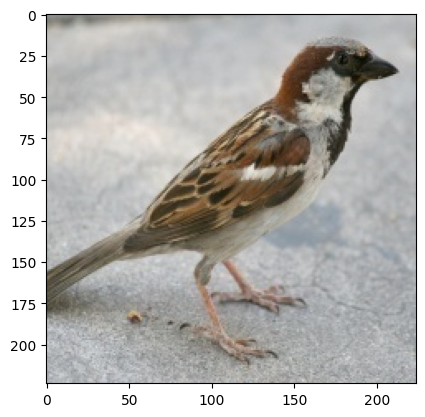

In [15]:
plt.imshow(image[0].transpose(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


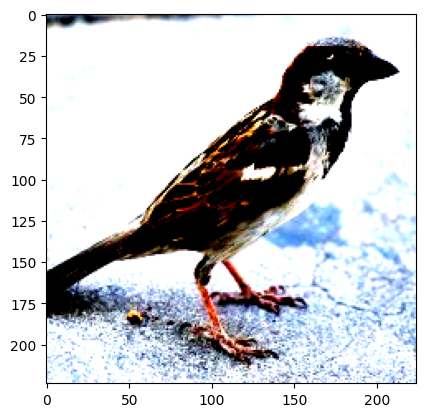

In [16]:
normalise_means = [0.4914, 0.4822, 0.4465]
normalise_stds = [0.2023, 0.1994, 0.2010]

def normalise_image(image):
    image = image.copy()
    for i in range(3):
        image[:, i, :, :] = (image[:, i, :, :] - normalise_means[i]) / normalise_stds[i]
    return image

image = normalise_image(image)
plt.imshow(image[0].transpose(1, 2, 0))

## Predicting the class and comparing it to ground truth

In [17]:
onnx_path = '../model/model.onnx'
session = rt.InferenceSession(onnx_path)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

pred_onx = session.run([output_name], {input_name: image})[0]
class_pred = np.argmax(pred_onx)

bird_name_map = json.load(open('../model/birds_name_mapping.json'))

print("Prediction:", bird_name_map[str(class_pred)])

Prediction: HOUSE SPARROW
